## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


start pre code outer

## Importing necessary libraries

## Loading the dataset

start pre-code inner

In [1]:
import importlib.util
import sys
import os
import subprocess


def installer():
    modules_list = [
        "notebook",
        "matplotlib",
        "pandas",
        "seaborn",
        "numpy",
        "scipy",
        "statsmodels",
        "-U scikit-learn",
        "ipykernel",
        "nb-black",
        "importlib.util",
        "sys",
        "os",
        "importlib.util",
        "subprocess",
        "warnings",
        "statsmodels.tools.sm_exceptions",
        "matplotlib.pyplot",
        "sklearn.model_selection.train_test_split",
        "statsmodels.stats.api",
        "statsmodels.stats.outliers_influence",
        "statsmodels.api",
        "statsmodels.tools.tools",
        "sklearn.tree.DecisionTreeClassifier",
        "sklearn.tree",
        "sklearn.model_selection.GridSearchCV",
        "sklearn.metrics.f1_score",
        "sklearn.metrics.accuracy_score",
        "sklearn.metrics.recall_score",
        "sklearn.metrics.precision_score",
        "sklearn.metrics.confusion_matrix",
        "sklearn.metrics.roc_auc_score",
        "sklearn.metrics.ConfusionMatrixDisplay",
        "sklearn.metrics.precision_recall_curve",
        "sklearn.metrics.roc_curve",
        "sklearn.metrics.make_scorer",
        "sklearn.metrics",  # new
        "from sklearn.ensemble.BaggingClassifier",  # new
        "RandomForestClassifier",  # new
        "sklearn.linear_model.LogisticRegression",  # new
        "xgboost.XGBClassifier", # boosting
        "xgboost",
        "operator",
        "openpyxl",

    ]
    uninstalled_list = []
    modules_list_modified = []
    unchecked_formatted_list = []

    def stringifier(string):
        string = string[3:15]
        return string

    def sort_output(name):
        string = name  #
        # module
        if string == "-U scikit-learn":
            module = stringifier(string)  # string = string[2:15] #
            return module
        # now have holder=scikit-learn
        else:
            module = string
            return string

    def loop_unformatted_packages(modules_list):
        for name in modules_list:  # '-U scikit-learn'
            unchecked_formatted_list.append(sort_output(name))
        return unchecked_formatted_list

    unchecked_formatted_list = loop_unformatted_packages(modules_list)

    def check_not_installed(name):
        """
        Check if a package (formatted) is installed or not.
        """
        if name in sys.modules:
            print(f"{name!r} already in sys.modules")
        elif (spec := importlib.util.find_spec(name)) is not None:
            # If you choose to perform the actual import ..
            module = importlib.util.module_from_spec(spec)
            sys.modules[name] = module
            spec.loader.exec_module(module)
            print(f"{name!r} has been imported")
        else:
            print(f"can't find the {name!r} module")
            return name

    def loop_formatted_packages(unchecked_formatted_list, uninstalled_list):
        """
        takes:
        - var unchecked_formatted_list
        - var uninstalled_list
        calls:
        - function check_not_installed
        """
        for name in unchecked_formatted_list:  # '-U scikit-learn'
            if check_not_installed(name):
                uninstalled_list.append(name)
        return uninstalled_list

    uninstalled_list = loop_formatted_packages(
        unchecked_formatted_list, uninstalled_list
    )

    print("\nuninstalled modules are:", uninstalled_list, "\n")

    newly_installed = []

    def installer(uninstalled_list):
        for name in uninstalled_list:
            if name == "scikit-learn":
                name2 = "-U " + name
            os.system("pip install {}".format(name2))
            print(name, "module has been installed")
            newly_installed.append(name)
        print("\n", newly_installed, "modules have just been installed")

    installer(uninstalled_list)


In [2]:
# installer()

In [3]:
# uninstalled_list_2 = ['pandas', 'matplotlib']
# installer(uninstalled_list_2)

In [4]:
import operator

In [5]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    # plot_confusion_matrix,
    ConfusionMatrixDisplay,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

In [6]:
# legacy: this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black


import pandas as pd
# import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV # (To tune different models)
from sklearn import metrics # new
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier # new
from sklearn.linear_model import LogisticRegression # new

# legacy import:
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# On:
# previous:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
# pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)
# end previous

# To build model for prediction
import statsmodels.stats.api as sms

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
# from previous
# duplicate import from above
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

%reload_ext nb_black


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

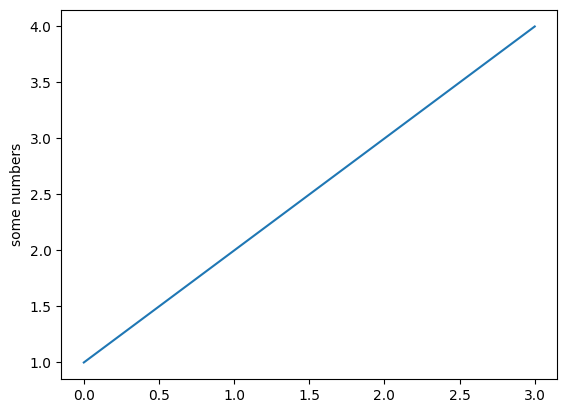

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# add matplotlib tutorial
# https://matplotlib.org/stable/tutorials/introductory/pyplot.html
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

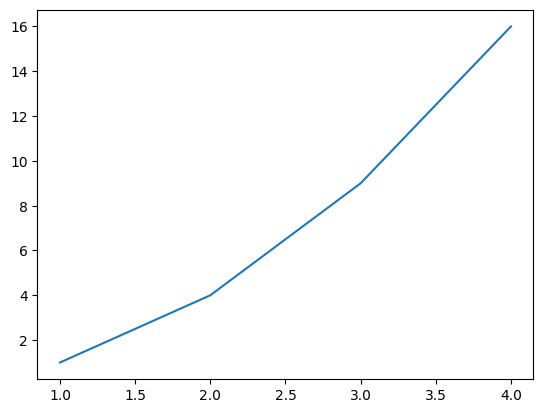

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

In [9]:
import warnings
warnings.filterwarnings("ignore")

# import numpy as np   
# import pandas as pd

# import seaborn as sns
# import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
# from xgboost import XGBRegressor
# from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# On
# Removes the limit for the number of displayed columns
# pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
# pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# has SMOTE
# To help with reading and manipulation of data
import numpy as np
from numpy import array
import pandas as pd

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data
from sklearn.model_selection import train_test_split

# To impute missing values
from sklearn.impute import SimpleImputer

# To do one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# To build a decision tree model
from sklearn.tree import DecisionTreeClassifier

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)


# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

end pre-code inner

In [12]:
# df = pd.read_csv("/workspaces/codespaces-jupyter/data/Train.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

end pre code outer

In [13]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
import csv

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
def display_full(x):
    with pd.option_context('display.max_rows', None,
                           'display.max_columns', None,
                           'display.width', 2000,
                           'display.float_format', '{:20,.2f}'.format,
                           'display.max_colwidth', None):
        display(x)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
def display_3r(x):
    with pd.option_context('display.max_rows', 3,
                           'display.max_columns', None,
                           'display.width', 2000,
                           'display.float_format', '{:20,.2f}'.format,
                           'display.max_colwidth', None):
        display(x)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
def display_arbitrary(x, rows=3, columns=None):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', columns,
                           'display.width', 2000,
                           'display.float_format', '{:20,.2f}'.format,
                           'display.max_colwidth', None):
        display(x)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Loading the dataset

In [18]:
df = pd.read_csv('/workspaces/codespaces-jupyter/data/Train.csv') ##  Complete the code to read the data
df_test = pd.read_csv('/workspaces/codespaces-jupyter/data/Test.csv') ##  Complete the code to read the data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
display_arbitrary(df, rows=4)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.46,-4.68,3.10,0.51,-0.22,-2.03,-2.91,0.05,-1.52,3.76,-5.71,0.74,0.98,1.42,-3.38,-3.05,0.31,2.91,2.27,4.39,-2.39,0.65,-1.19,3.13,0.67,-2.51,-0.04,0.73,-3.98,-1.07,1.67,3.06,-1.69,2.85,2.24,6.67,0.44,-2.37,2.95,-3.48,0
1,3.37,3.65,0.91,-1.37,0.33,2.36,0.73,-4.33,0.57,-0.10,1.91,-0.95,-1.26,-2.71,0.19,-4.77,-2.21,0.91,0.76,-5.83,-3.07,1.60,-1.76,1.77,-0.27,3.63,1.50,-0.59,0.78,-0.20,0.02,-1.80,3.03,-2.47,1.89,-2.30,-1.73,5.91,-0.39,0.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19998,-3.19,-10.05,5.70,-4.37,-5.35,-1.87,-3.95,0.68,-2.39,5.46,1.58,3.57,9.23,2.55,-7.04,-0.99,-9.66,1.16,3.88,3.52,-7.02,-0.13,-3.45,-4.80,-0.88,-3.81,5.42,-3.73,0.61,5.26,1.91,0.40,3.16,3.75,8.53,8.45,0.20,-7.13,4.25,-6.11,0
19999,-2.69,1.96,6.14,2.60,2.66,-4.29,-2.34,0.97,-1.03,0.50,-9.59,3.18,1.05,-1.42,-4.67,-5.41,3.72,2.89,2.33,1.46,-6.43,1.82,0.81,7.79,0.33,5.26,-4.87,-0.82,-5.67,-2.86,4.67,6.62,-1.99,-1.35,3.95,5.45,-0.46,-2.20,1.68,-1.97,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [20]:
# Checking the number of rows and columns in the training data
df.shape ##  Complete the code to view dimensions of the train data

(20000, 41)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# Checking the number of rows and columns in the test data
df_test.shape ##  Complete the code to view dimensions of the test data

(5000, 41)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
# let's create a copy of the training data
data = df.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# let's create a copy of the training data
data_test = df_test.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Displaying the first few rows of the dataset

In [24]:
# let's view the first 5 rows of the data
display_full(data.head()) ##  Complete the code to view top 5 rows of the data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.46,-4.68,3.10,0.51,-0.22,-2.03,-2.91,0.05,-1.52,3.76,-5.71,0.74,0.98,1.42,-3.38,-3.05,0.31,2.91,2.27,4.39,-2.39,0.65,-1.19,3.13,0.67,-2.51,-0.04,0.73,-3.98,-1.07,1.67,3.06,-1.69,2.85,2.24,6.67,0.44,-2.37,2.95,-3.48,0
1,3.37,3.65,0.91,-1.37,0.33,2.36,0.73,-4.33,0.57,-0.10,1.91,-0.95,-1.26,-2.71,0.19,-4.77,-2.21,0.91,0.76,-5.83,-3.07,1.60,-1.76,1.77,-0.27,3.63,1.50,-0.59,0.78,-0.20,0.02,-1.80,3.03,-2.47,1.89,-2.30,-1.73,5.91,-0.39,0.62,0
2,-3.83,-5.82,0.63,-2.42,-1.77,1.02,-2.10,-3.17,-2.08,5.39,-0.77,1.11,1.14,0.94,-3.16,-4.25,-4.04,3.69,3.31,1.06,-2.14,1.65,-1.66,1.68,-0.45,-4.55,3.74,1.13,-2.03,0.84,-1.60,-0.26,0.80,4.09,2.29,5.36,0.35,2.94,3.84,-4.31,0
3,1.62,1.89,7.05,-1.15,0.08,-1.53,0.21,-2.49,0.34,2.12,-3.05,0.46,2.70,-0.64,-0.45,-3.17,-3.40,-1.28,1.58,-1.95,-3.52,-1.21,-5.63,-1.82,2.12,5.29,4.75,-2.31,-3.96,-6.03,4.95,-3.58,-2.58,1.36,0.62,5.55,-1.53,0.14,3.10,-1.28,0
4,-0.11,3.87,-3.76,-2.98,3.79,0.54,0.21,4.85,-1.85,-6.22,2.00,4.72,0.71,-1.99,-2.63,4.18,2.25,3.73,-6.31,-5.38,-0.89,2.06,9.45,4.49,-3.95,4.58,-8.78,-3.38,5.11,6.79,2.04,8.27,6.63,-10.07,1.22,-3.23,1.69,-2.16,-3.64,6.51,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# let's view the last 5 rows of the data
display_arbitrary(data_test.tail(), rows=None) ##  Complete the code to view last 5 rows of the data  

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
4995,-5.12,1.63,1.25,4.04,3.29,-2.93,-1.33,1.75,-2.98,1.25,-6.88,3.72,-2.51,-1.39,-2.55,-2.20,4.77,2.40,3.79,0.49,-2.03,1.78,3.67,11.37,-1.98,2.25,-7.32,1.91,-3.73,-0.01,2.12,9.98,0.06,0.22,3.04,2.11,-0.56,1.94,0.51,-2.69,0
4996,-5.17,1.17,1.58,1.22,2.53,-0.67,-2.62,-2.00,0.63,-0.58,-3.67,0.46,3.32,-1.07,-7.11,-4.36,-0.00,3.70,-0.85,-0.22,-3.64,0.74,0.93,3.28,-2.28,4.46,-4.54,-1.35,-1.78,0.35,-0.21,4.42,2.60,-2.15,0.92,2.16,0.47,0.47,2.20,-2.38,0
4997,-1.11,-0.40,-1.76,-5.88,3.57,3.71,-2.48,-0.31,-0.92,-3.00,-0.11,-1.98,-1.62,-0.95,-2.74,-0.81,0.61,8.15,-9.20,-3.87,-0.30,1.47,2.88,2.79,-1.14,1.20,-4.34,-2.87,4.12,4.20,3.47,3.79,7.48,-10.06,-0.39,1.85,1.82,-1.25,-1.26,7.47,0
4998,-1.70,0.61,6.22,-0.10,0.96,-3.28,-1.63,-0.10,1.39,-1.07,-7.97,2.26,3.13,-0.49,-3.50,-4.56,3.14,2.54,-0.79,4.40,-4.07,-0.04,-2.37,-1.54,2.91,3.21,-0.17,-1.54,-4.72,-5.53,1.67,-4.10,-5.95,0.55,-1.57,6.82,2.14,-4.04,3.44,0.58,0
4999,-0.60,0.96,-0.72,8.23,-1.82,-2.28,-2.57,-1.04,4.13,-2.73,-3.29,-1.67,0.46,-1.65,-5.26,-7.99,6.48,0.23,4.96,6.75,-6.31,3.27,1.90,3.27,-0.64,-0.92,-6.76,2.99,-0.81,3.50,-8.43,2.37,-1.06,0.79,4.95,-7.44,-0.07,-0.92,-2.29,-5.36,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Checking the data types of the columns for the dataset

In [26]:
# let's check the data types of the columns in the dataset
data.info(verbose=True, memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
import io
buffer = io.StringIO()
data.info(buf=buffer)
s = buffer.getvalue()
with open("data_info.txt", "w",
          encoding="utf-8") as f:  
    f.write(s)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
with open('data_info.txt') as f:
    lines = f.readlines()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

alternative way to read in from txt file,<br>
to handle delimiters

In [29]:
len(lines)

48

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
dict_line_delin = {}
with open('data_info.txt', newline = '') as lines_txt:
	line_reader = csv.reader(lines_txt, delimiter='\t')
	for i, line_txt in enumerate(line_reader):
		print(line_txt)
		if i > 2 and i < len(lines)-1:
			dict_line_delin.update({line_txt[0][5:8]:line_txt[0][len(' 0   V1      '):]})

["<class 'pandas.core.frame.DataFrame'>"]
['RangeIndex: 20000 entries, 0 to 19999']
['Data columns (total 41 columns):']
[' #   Column  Non-Null Count  Dtype  ']
['---  ------  --------------  -----  ']
[' 0   V1      19982 non-null  float64']
[' 1   V2      19982 non-null  float64']
[' 2   V3      20000 non-null  float64']
[' 3   V4      20000 non-null  float64']
[' 4   V5      20000 non-null  float64']
[' 5   V6      20000 non-null  float64']
[' 6   V7      20000 non-null  float64']
[' 7   V8      20000 non-null  float64']
[' 8   V9      20000 non-null  float64']
[' 9   V10     20000 non-null  float64']
[' 10  V11     20000 non-null  float64']
[' 11  V12     20000 non-null  float64']
[' 12  V13     20000 non-null  float64']
[' 13  V14     20000 non-null  float64']
[' 14  V15     20000 non-null  float64']
[' 15  V16     20000 non-null  float64']
[' 16  V17     20000 non-null  float64']
[' 17  V18     20000 non-null  float64']
[' 18  V19     20000 non-null  float64']
[' 19  V20     200

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
dict_line_delin

{'Col': 'Non-Null Count  Dtype  ',
 '---': '--------------  -----  ',
 'V1 ': '19982 non-null  float64',
 'V2 ': '19982 non-null  float64',
 'V3 ': '20000 non-null  float64',
 'V4 ': '20000 non-null  float64',
 'V5 ': '20000 non-null  float64',
 'V6 ': '20000 non-null  float64',
 'V7 ': '20000 non-null  float64',
 'V8 ': '20000 non-null  float64',
 'V9 ': '20000 non-null  float64',
 'V10': '20000 non-null  float64',
 'V11': '20000 non-null  float64',
 'V12': '20000 non-null  float64',
 'V13': '20000 non-null  float64',
 'V14': '20000 non-null  float64',
 'V15': '20000 non-null  float64',
 'V16': '20000 non-null  float64',
 'V17': '20000 non-null  float64',
 'V18': '20000 non-null  float64',
 'V19': '20000 non-null  float64',
 'V20': '20000 non-null  float64',
 'V21': '20000 non-null  float64',
 'V22': '20000 non-null  float64',
 'V23': '20000 non-null  float64',
 'V24': '20000 non-null  float64',
 'V25': '20000 non-null  float64',
 'V26': '20000 non-null  float64',
 'V27': '20000 non-n

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
display_arbitrary(lines, rows=5)

["<class 'pandas.core.frame.DataFrame'>\n",
 'RangeIndex: 20000 entries, 0 to 19999\n',
 'Data columns (total 41 columns):\n',
 ' #   Column  Non-Null Count  Dtype  \n',
 '---  ------  --------------  -----  \n',
 ' 0   V1      19982 non-null  float64\n',
 ' 1   V2      19982 non-null  float64\n',
 ' 2   V3      20000 non-null  float64\n',
 ' 3   V4      20000 non-null  float64\n',
 ' 4   V5      20000 non-null  float64\n',
 ' 5   V6      20000 non-null  float64\n',
 ' 6   V7      20000 non-null  float64\n',
 ' 7   V8      20000 non-null  float64\n',
 ' 8   V9      20000 non-null  float64\n',
 ' 9   V10     20000 non-null  float64\n',
 ' 10  V11     20000 non-null  float64\n',
 ' 11  V12     20000 non-null  float64\n',
 ' 12  V13     20000 non-null  float64\n',
 ' 13  V14     20000 non-null  float64\n',
 ' 14  V15     20000 non-null  float64\n',
 ' 15  V16     20000 non-null  float64\n',
 ' 16  V17     20000 non-null  float64\n',
 ' 17  V18     20000 non-null  float64\n',
 ' 18  V19   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
type(lines)

list

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
lines[0][0:-1]

"<class 'pandas.core.frame.DataFrame'>"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

`data.info` -> read to txt -> read to `lines` var -> elements of `lines` called here

In [35]:
lines[0:2] # returns 2 lines as a list of strings

["<class 'pandas.core.frame.DataFrame'>\n",
 'RangeIndex: 20000 entries, 0 to 19999\n']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
type(lines[0])

str

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
type(lines[0:5])

list

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
a=lines[0:5] 
b=['<br> . . . <br>']
c=lines[-4:-1]

print(a[:], b[:], c[:],sep='\n')

["<class 'pandas.core.frame.DataFrame'>\n", 'RangeIndex: 20000 entries, 0 to 19999\n', 'Data columns (total 41 columns):\n', ' #   Column  Non-Null Count  Dtype  \n', '---  ------  --------------  -----  \n']
['<br> . . . <br>']
[' 39  V40     20000 non-null  float64\n', ' 40  Target  20000 non-null  int64  \n', 'dtypes: float64(40), int64(1)\n']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

combine elements of output from dictionary format with lst / string format techniques:

In [131]:
a=list(dict_line_delin.values())
type(a)
a_keys=list(dict_line_delin.keys())
print(type(a_keys))
b=' . . . . . . . . . . . . . . '
# c=dict_line_delin[-4:-1]

# print(a, b, c,sep='\n')
for count, (key, val) in enumerate(zip(a_keys, a)):
    # print(count)
    if count <= 2 or count >= 39:
        print(key, ':' ,val)
    elif count == 3:
        print(b)
    elif count == 44:
        pass
    else:
        pass
    # if count>42:
        # print('count > 42: ',count) # 43

<class 'list'>
Col : Non-Null Count  Dtype  
--- : --------------  -----  
V1  : 19982 non-null  float64
 . . . . . . . . . . . . . . 
V38 : 20000 non-null  float64
V39 : 20000 non-null  float64
V40 : 20000 non-null  float64
Tar : 20000 non-null  int64  
s:  : 64(40), int64(1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Checking for duplicate values

In [39]:
# let's check for duplicate values in the data

display_arbitrary(data.duplicated(),rows=10) ##  Complete the code to check duplicate entries in the data

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Length: 20000, dtype: bool

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
# brought forward in nb
data_duplicates = data.duplicated()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
display_arbitrary(data_duplicates,rows=10)

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Length: 20000, dtype: bool

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
display_3r(data_duplicates)

0        False
         ...  
19999    False
Length: 20000, dtype: bool

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
display_arbitrary(data_duplicates, rows=5)

0        False
1        False
         ...  
19998    False
19999    False
Length: 20000, dtype: bool

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
# work with duplicated() output
data_duplicates = data.duplicated()
for boolean in data_duplicates:
    if boolean == True:
        print("There are duplicate values in the data")
        break
    else:
        print("There are no duplicate values in the data")
        break

There are no duplicate values in the data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Checking for missing values

In [47]:
# MT_MLS2_supermarket_campaign_2_template_pre_quiz.ipynb
# let's check for missing values in the data
display_arbitrary(round(data.isnull().sum() / data.isnull().count() * 100, 2), rows=10)

V1                       0.09
V2                       0.09
V3                       0.00
V4                       0.00
V5                       0.00
                 ...         
V37                      0.00
V38                      0.00
V39                      0.00
V40                      0.00
Target                   0.00
Length: 41, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
missing_pre_dictionary = round(data.isnull().sum() / data.isnull().count() * 100, 2) # Note: # type(missing_pre_dictionary) = pandas.core.series.Series

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Q/ What to do with `pandas.core.series.Series` returned by `missing_pre_dictionary` above?<br>
A/ Add `pandas.core.series.Series` (returned by `missing_pre_dictionary` above)<br>
    - to variable (`missing_pre_dictionary`)<br>
        then<br>
    - loop through missing values output

In [49]:
missing_values_dict = {}
missing_pre_dictionary = round(data.isnull().sum() / data.isnull().count() * 100, 2)
pre_index = missing_pre_dictionary.index # Note: # print(type(pre_index)) # <class 'pandas.core.indexes.base.Index'>
pre_idx_list = pre_index.tolist()
mpdlist = missing_pre_dictionary.to_list()
for counter, pcnt_msng in zip(pre_idx_list, mpdlist):
    if pcnt_msng > 0:
        missing_values_dict.update({counter: pcnt_msng})     
missing_values_dict    

{'V1': 0.09, 'V2': 0.09}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
display_arbitrary(round(data.isnull().sum() / data.isnull().count() * 100, 2), rows=10)

V1                       0.09
V2                       0.09
V3                       0.00
V4                       0.00
V5                       0.00
                 ...         
V37                      0.00
V38                      0.00
V39                      0.00
V40                      0.00
Target                   0.00
Length: 41, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

missing values for data train

In [51]:
# let's check for missing values in the data
# data.'_______' ##  Complete the code to check missing entries in the train data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
display_arbitrary(round(data_test.isnull().sum() / data_test.isnull().count() * 100, 2),10)

V1                       0.10
V2                       0.12
V3                       0.00
V4                       0.00
V5                       0.00
                 ...         
V37                      0.00
V38                      0.00
V39                      0.00
V40                      0.00
Target                   0.00
Length: 41, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
missing_pre_dictionary = round(data.isnull().sum() / data.isnull().count() * 100, 2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

missing values for data test TODO:

In [132]:
def msng_val_loop(dataset):
	missing_values_dict = {}
	missing_pre_dictionary = round(dataset.isnull().sum() / dataset.isnull().count() * 100, 2)
	pre_index = missing_pre_dictionary.index # Note: # print(type(pre_index)) # <class 'pandas.core.indexes.base.Index'>
	pre_idx_list = pre_index.tolist()
	mpdlist = missing_pre_dictionary.to_list()
	for counter, pcnt_msng in zip(pre_idx_list, mpdlist):
	    if pcnt_msng > 0:
	        missing_values_dict.update({counter: pcnt_msng})     
	missing_values_dict
	return missing_values_dict

msng_val_loop(data_test)

{'V1': 0.1, 'V2': 0.12}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

see above for missing values in data test

In [54]:
# let's check for missing values in the data
# data_test.'_______' ##  Complete the code to check missing entries in the test data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Statistical summary of the dataset

In [134]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T ##  Complete the code to print the statitical summary of the train data

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

### Univariate analysis

In [161]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(6, 4), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=1,  # Number of rows of the subplot grid= 2
        ncols=2,
        # nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        # gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Plotting histograms and boxplots for all the variables

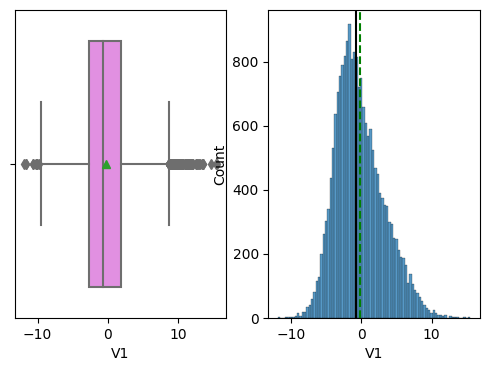

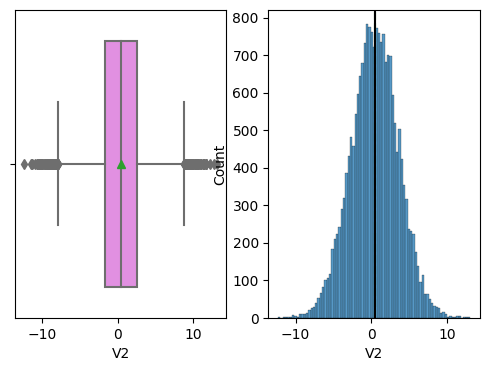

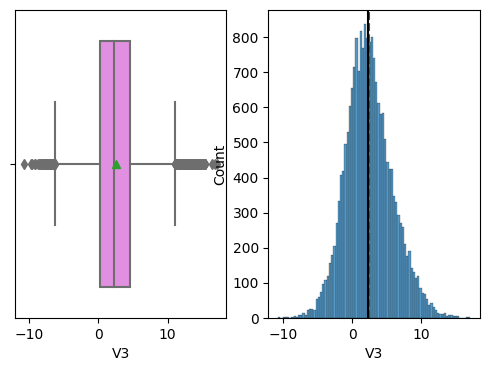

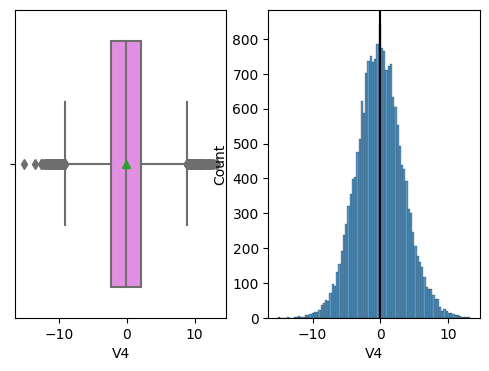

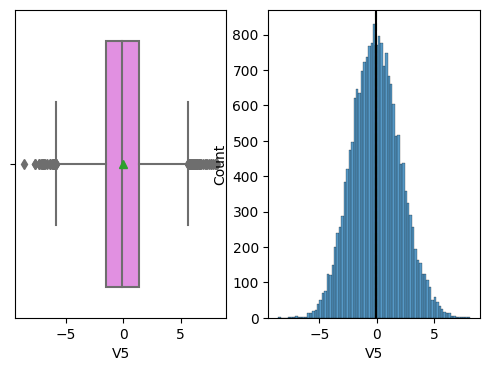

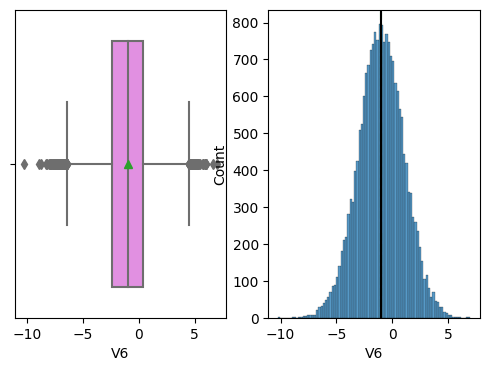

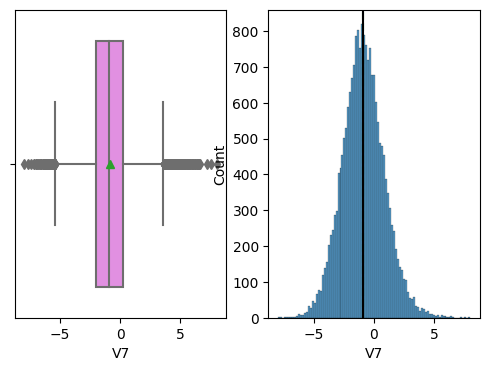

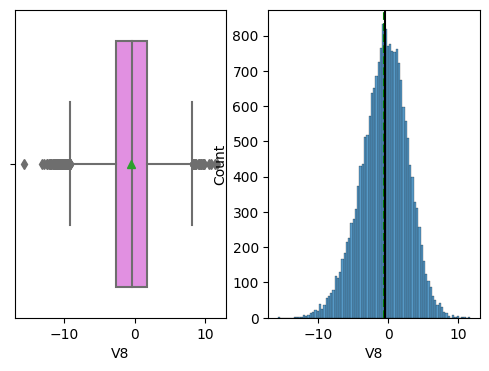

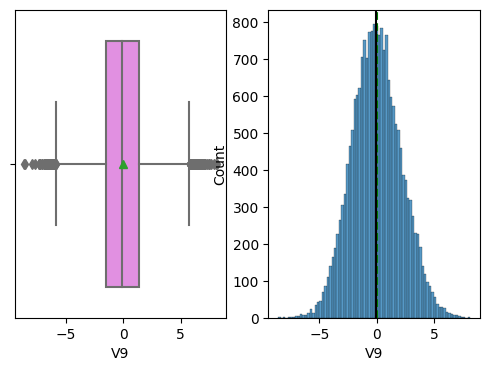

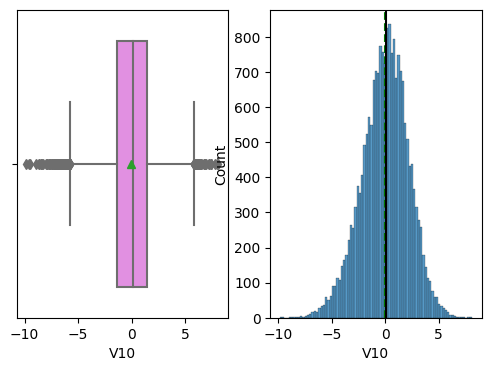

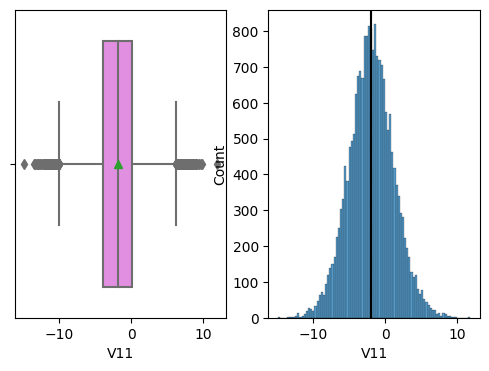

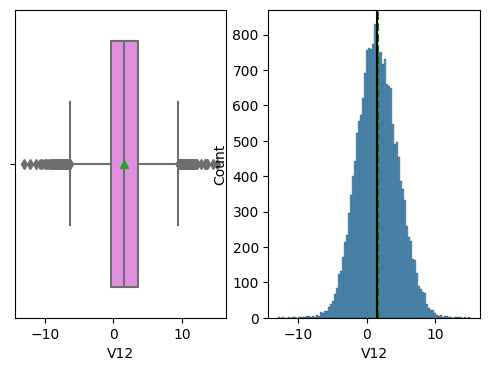

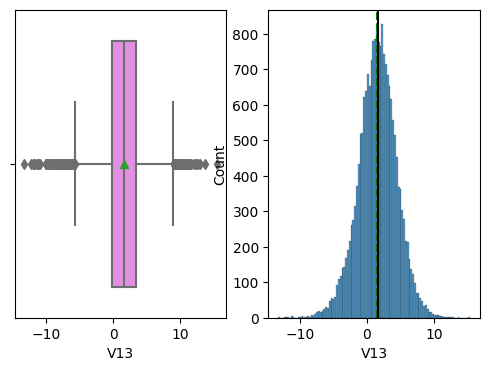

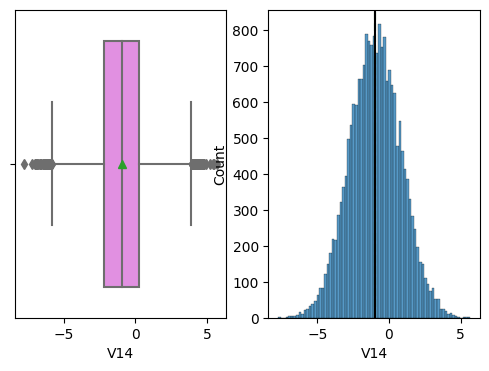

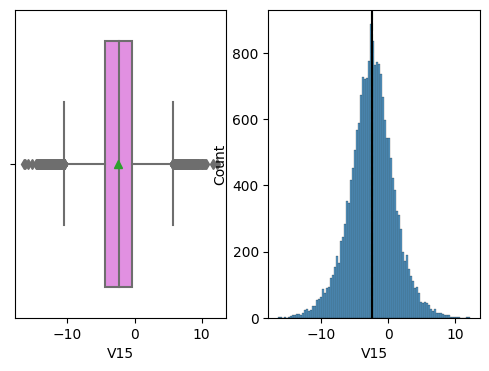

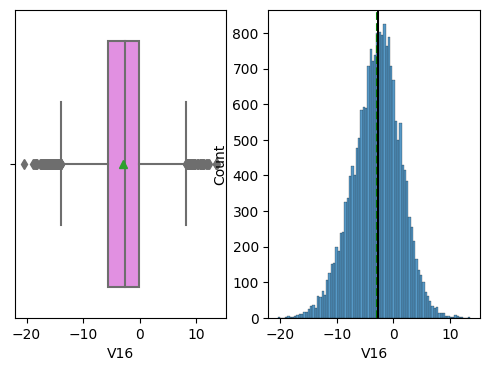

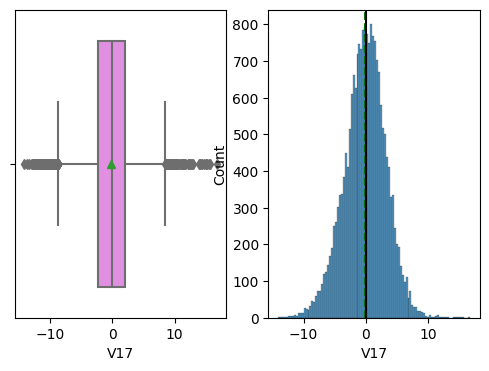

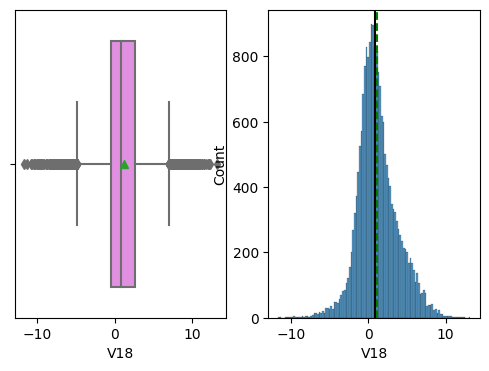

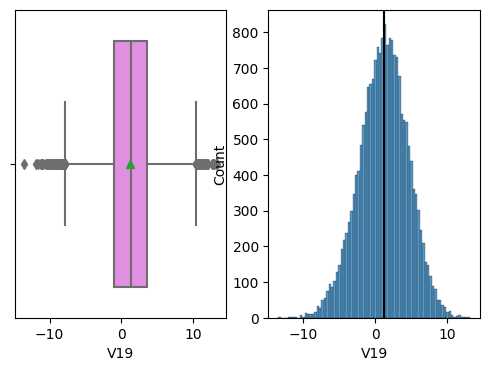

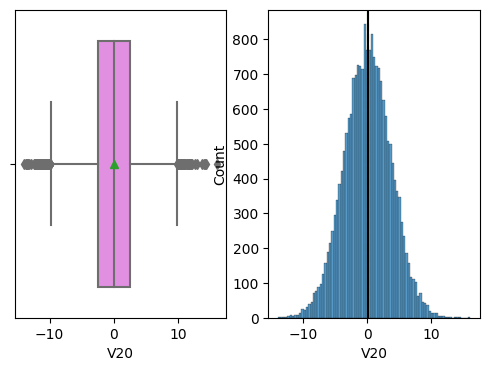

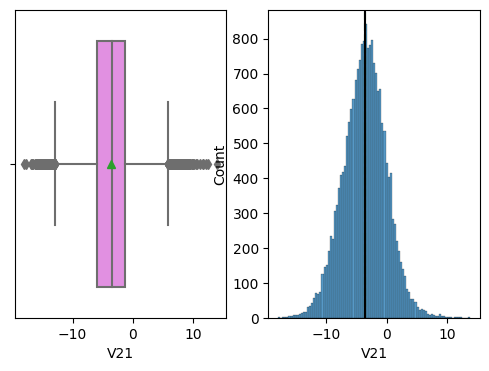

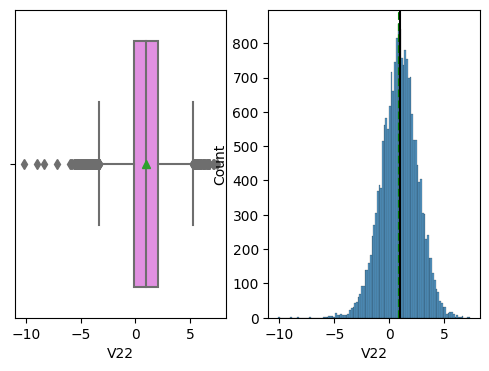

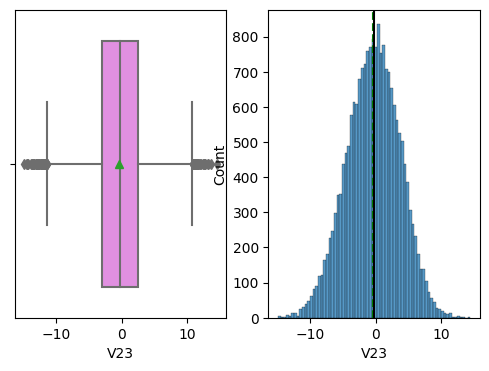

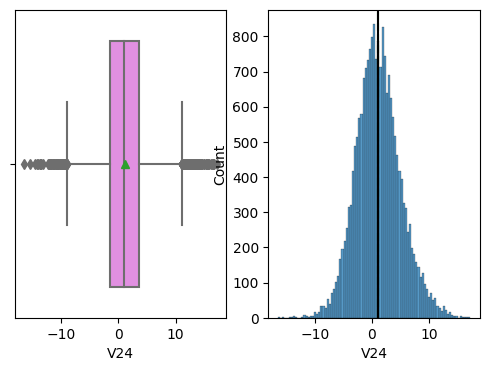

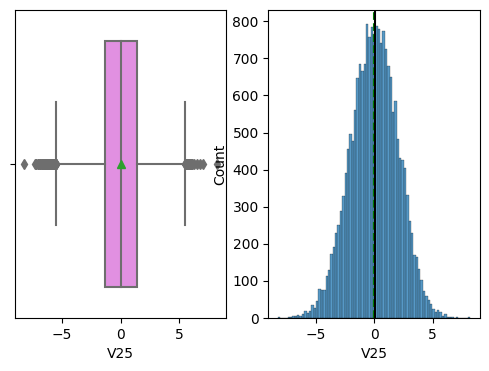

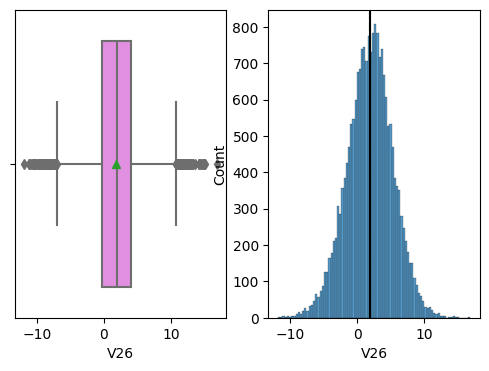

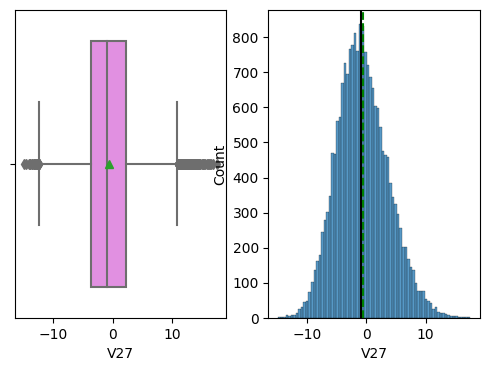

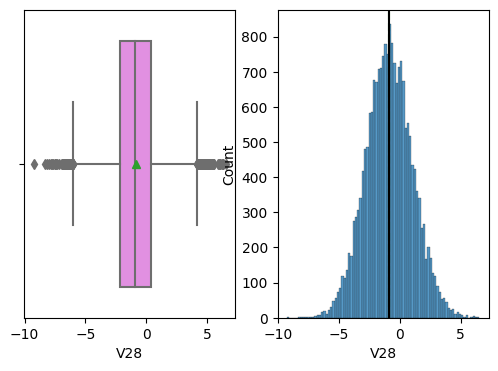

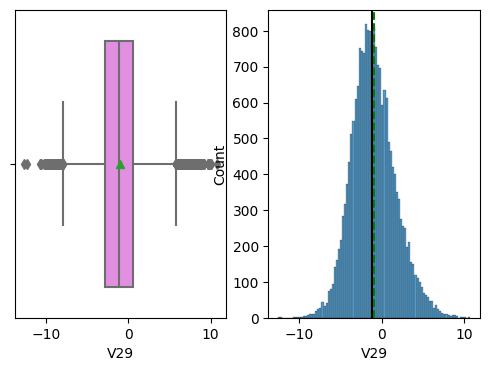

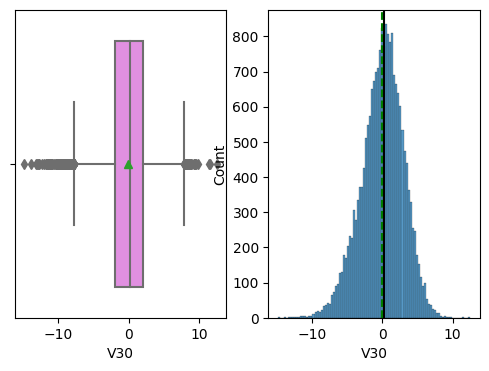

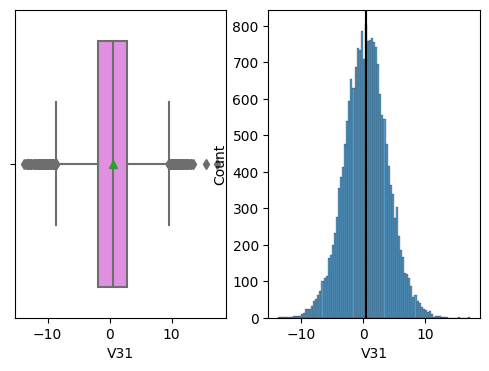

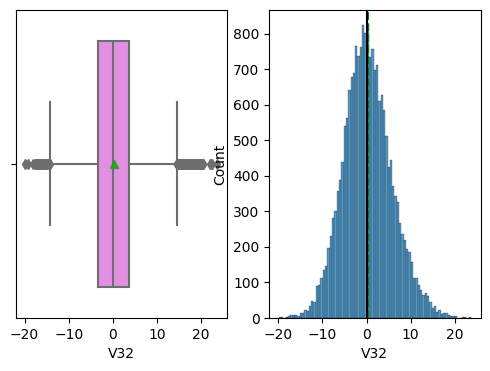

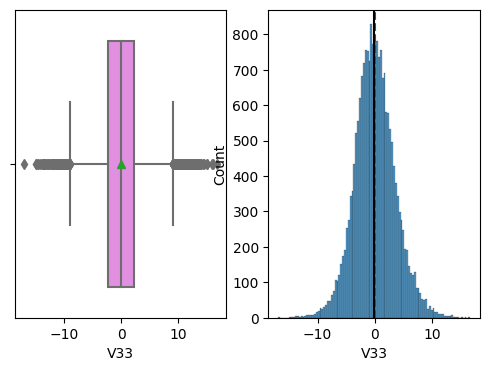

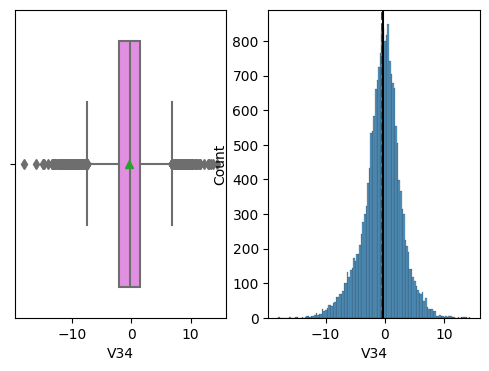

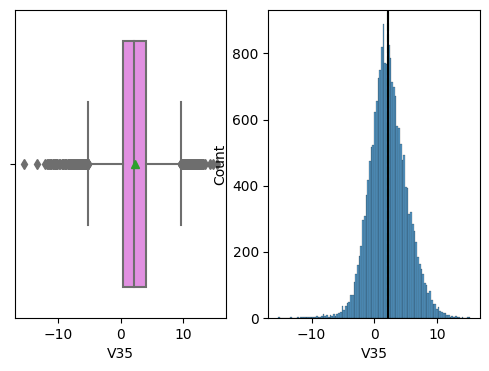

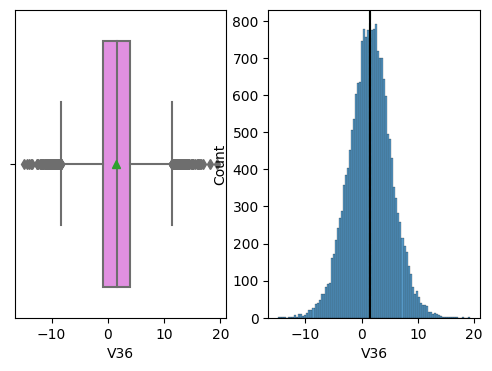

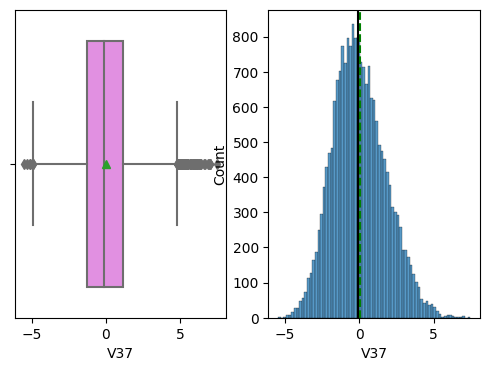

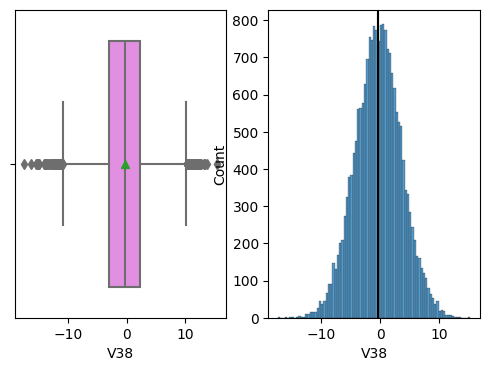

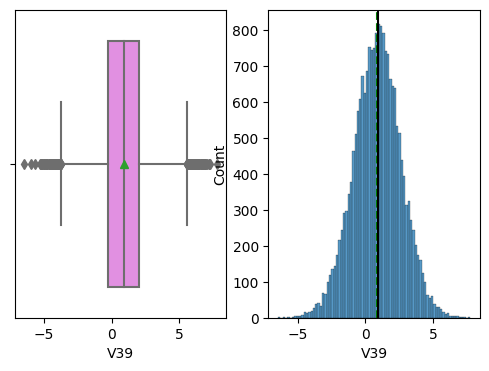

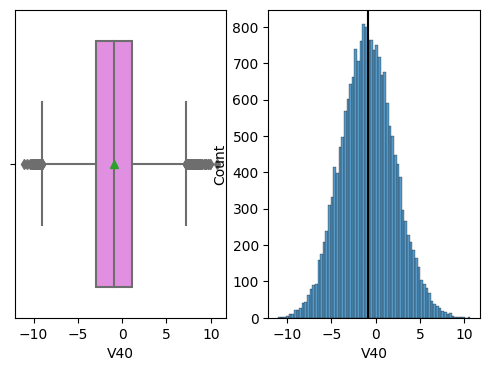

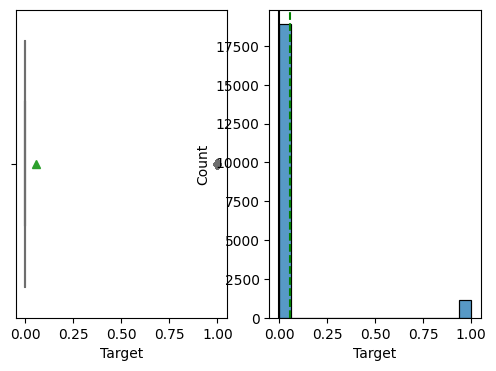

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [162]:
for feature in df.columns:
    histogram_boxplot(data, feature, figsize=(6, 4), kde=False, bins=None)

### Let's look at the values in target variable

In [ ]:
data["Target"].'_______' ##  Complete the code to check the class distribution in target variable for train data

In [ ]:
data_test["Target"].'_______' ##  Complete the code to check the class distribution in target variable for test data

## Data Pre-Processing

In [ ]:
# Dividing train data into X and y 
X = data.drop(["Target"], axis=1)
y = data["Target"]

**Since we already have a separate test set, we don't need to divide data into train, valiation and test**


In [ ]:
# Splitting train dataset into training and validation set

X_train, X_val, y_train, y_val = train_test_split('_______') ## Complete the code to split the train dataset into train test in the ratio 75:25

In [ ]:
# Checking the number of rows and columns in the X_train data
X_train.'_______' ##  Complete the code to view dimensions of the X_train data

# Checking the number of rows and columns in the X_val data
X_val.'_______' ##  Complete the code to view dimensions of the X_val data

In [ ]:
# Dividing test data into X_test and y_test

X_test = data_test.'_______' ##  Complete the code to drop target variable from test data
y_test = data_test'_______' ##  Complete the code to store target variable in y_test

In [ ]:
# Checking the number of rows and columns in the X_test data
X_test.'_______' ##  Complete the code to view dimensions of the X_test data

## Missing value imputation




In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="median")

In [ ]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer._______(X_val), columns=X_train.columns) ## Complete the code to impute missing values in X_val without data leakage

# Transform the test data
X_test = pd.DataFrame(imputer._______(X_test), columns=X_train.columns) ## Complete the code to impute missing values in X_test without data leakage

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)

X_val.'_______' ## Complete the code to check the count of missing values in validation set
X_test.'_______' ## Complete the code to check the count of missing values in test set

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0],
    )

    return df_perf

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model Building on original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
'_______' ## Complete the code to append remaining 4 models in the list models

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with oversampled data

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
'_______' ## Complete the code to append remaining 4 models in the list models

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=_______, y=_______, scoring=scorer, cv=kfold
    )  ## Complete the code to build models on oversampled data
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(______,______)## Complete the code to build models on oversampled data 
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

In [ ]:
# Plotting boxplots for CV scores of all models defined above
'_______' ## Write the code to create boxplot to check model performance on oversampled data

### Model Building with undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
'_______' ## Complete the code to append remaining 4 models in the list models

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=_______, y=_______, scoring=scorer, cv=kfold
    )  ## Complete the code to build models on undersampled data
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(______,______)## Complete the code to build models on undersampled data 
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

In [ ]:
# Plotting boxplots for CV scores of all models defined above
'_______' ## Write the code to create boxplot to check model performance on undersampled data

**After looking at performance of all the models, let's decide which models can further improve with hyperparameter tuning.**

**Note**: You can choose to tune some other model if XGBoost gives error.

## Hyperparameter Tuning

### **Note**
1. Sample parameter grid has been provided to do necessary hyperparameter tuning. One can extend/reduce the parameter grid based on execution time and system configuration to try to improve the model performance further wherever needed.      
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



### Tuning AdaBoost using oversampled data

In [ ]:
%%time 

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_ada = AdaBoostClassifier(
    n_estimators= _______, learning_rate= _______, base_estimator= DecisionTreeClassifier(max_depth=_______, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada.'_______' ## Complete the code to fit the model on oversampled data

In [ ]:
ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)
ada_train_perf

In [ ]:
ada_val_perf = '_______' ## Complete the code to check the performance on validation set
ada_val_perf

### Tuning Random forest using undersampled data

In [ ]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.'_______' ## Complete the code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features=_______,
    random_state=1,
    max_samples=_______,
    n_estimators=_______,
    min_samples_leaf=_______,
)## Complete the code with the best parameters obtained from tuning

tuned_rf2.'_______' ## Complete the code to fit the model on under sampled data

In [ ]:
rf2_train_perf = '_______' ## Complete the code to check the performance on undersampled train set
rf2_train_perf

In [ ]:
rf2_val_perf = '_______' ## Complete the code to check the performance on validation set
rf2_val_perf

### Tuning Gradient Boosting using oversampled data

In [ ]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=_______,
    random_state=1,
    learning_rate=_______,
    n_estimators=_______,
    subsample=_______,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm.fit(X_train_over, y_train_over)

In [ ]:
gbm_train_perf = '_______' ## Complete the code to check the performance on oversampled train set
gbm_train_perf

In [ ]:
gbm_val_perf = '_______' ## Complete the code to check the performance on validation set
gbm_val_perf

### Tuning XGBoost using oversampled data

**Note**: You can choose to skip this section if XGBoost gives error.

In [ ]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.'_______' ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=_______,
    scale_pos_weight=_______,
    n_estimators=_______,
    learning_rate=_______,
    gamma=_______,
)## Complete the code with the best parameters obtained from tuning

xgb2.'_______' ## Complete the code to fit the model on over sampled data

In [ ]:
xgb2_train_perf =  '_______' ## Complete the code to check the performance on oversampled train set
xgb2_train_perf

In [ ]:
xgb2_val_perf =  '_______' ## Complete the code to check the performance on validation set
xgb2_val_perf

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_train_perf.T,
        ada_train_perf.T,
        rf2_train_perf.T,
        xgb2_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost classifier tuned with oversampled data",
    "Random forest tuned with undersampled data",
    "XGBoost tuned with oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# validation performance comparison

'_______' ## Write the code to compare the performance on validation set

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [ ]:
# Let's check the performance on test set
'_______' ## Write the code to check the performance of best model on test data

### Feature Importances

In [ ]:
feature_names = X_train.columns
importances =  '_______' ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Let's use Pipelines to build the final model

- Since we have only one datatype in the data, we don't need to use column transformer here

In [ ]:
Pipeline_model = Pipeline('_______' ) ## Complete the code to create pipeline for the best model

In [ ]:
# Separating target variable and other variables
X1 = data.drop(columns="Target")
Y1 = data["Target"]

# Since we already have a separate test set, we don't need to divide data into train and test

X_test1 = df_test.('_______') ##  Complete the code to drop target variable from test data
y_test1 = df_test['_______'] ##  Complete the code to store target variable in y_test1


In [ ]:
# We can't oversample/undersample data without doing missing value treatment, so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# We don't need to impute missing values in test set as it will be done inside pipeline

**Note:** Please perform either oversampling or undersampling based on the final model chosen.

If the best model is built on the oversampled data, uncomment and run the below code to perform oversampling

In [ ]:
# #code for oversampling on the data
# # Synthetic Minority Over Sampling Technique
# sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
# X_over1, y_over1 = sm.fit_resample(X1, Y1)

If the best model is built on the undersampled data, uncomment and run the below code to perform undersampling


In [ ]:
# # code for undersampling on the data
# # Under Sampling Technique
# rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
# X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
Pipeline_model.'_______' ##  Complete the code to fit the Model obtained from above step

In [ ]:
Pipeline_model_test = '_______'  ## Complete the code to check the performance on test set
Pipeline_model_test

# Business Insights and Conclusions


- Best model and its performance
- Important features
- Additional points

***